# Install Libraries and Dataset Importing

In [1]:
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#importing libraries
import pandas as pd 
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as ltb
from sklearn.ensemble import HistGradientBoostingClassifier

In [3]:
#importing the dataset
data = pd.read_csv("german credit risk1.csv")

## Data Preparation and pre-processing

In [4]:
#checking the shape of the dataset
data.shape

(5000, 21)

In [5]:
#checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            5000 non-null   object
 1   LoanDuration              5000 non-null   int64 
 2   CreditHistory             5000 non-null   object
 3   LoanPurpose               5000 non-null   object
 4   LoanAmount                5000 non-null   int64 
 5   ExistingSavings           5000 non-null   object
 6   EmploymentDuration        5000 non-null   object
 7   InstallmentPercent        5000 non-null   int64 
 8   Sex                       5000 non-null   object
 9   OthersOnLoan              5000 non-null   object
 10  CurrentResidenceDuration  5000 non-null   int64 
 11  OwnsProperty              5000 non-null   object
 12  Age                       5000 non-null   int64 
 13  InstallmentPlans          5000 non-null   object
 14  Housing                 

In [6]:
#checking how many unique values
data.nunique()

CheckingStatus                 4
LoanDuration                  59
CreditHistory                  5
LoanPurpose                   11
LoanAmount                  3354
ExistingSavings                5
EmploymentDuration             5
InstallmentPercent             6
Sex                            2
OthersOnLoan                   3
CurrentResidenceDuration       6
OwnsProperty                   4
Age                           53
InstallmentPlans               3
Housing                        3
ExistingCreditsCount           4
Job                            4
Dependents                     2
Telephone                      2
ForeignWorker                  2
Risk                           2
dtype: int64

In [7]:
#checking the duplicates values
data.duplicated().sum()

18

In [8]:
#remove the duplicates values
data=data.drop_duplicates()

In [9]:
data.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [10]:
#checking the messing values
data.isnull().sum()

CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

In [11]:
# remove warnings from all code 
import warnings
warnings.filterwarnings('ignore')

### outlier 

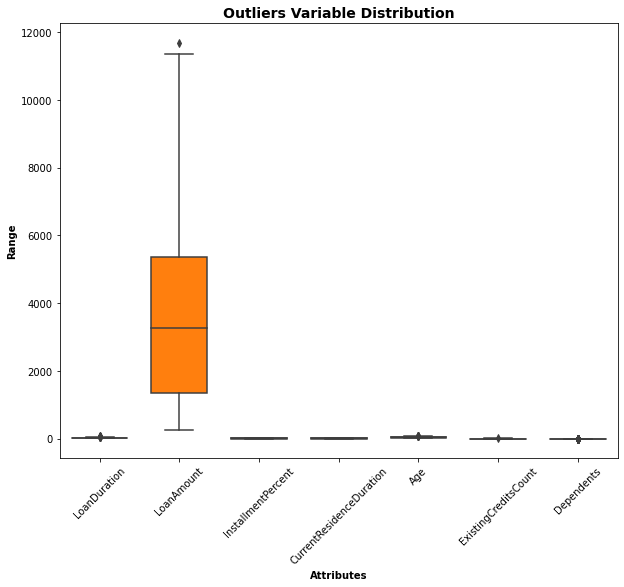

In [12]:
#checking the outliers
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data, orient="v", palette="tab10" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xticks(rotation=45)
plt.xlabel("Attributes", fontweight = 'bold');

In [13]:
#checking the statistical features of the dataset
data.describe()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,21.455841,3491.815536,2.989562,2.859093,35.993577,1.467483,1.165195
std,11.133832,2485.122687,1.122801,1.114332,10.618910,0.565741,0.371393
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,13.000000,1345.500000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,21.000000,3250.500000,3.000000,3.000000,36.000000,1.000000,1.000000
75%,30.000000,5358.750000,4.000000,4.000000,44.000000,2.000000,1.000000
max,64.000000,11676.000000,6.000000,6.000000,74.000000,4.000000,2.000000


In [14]:
#checking the names of the columns
data.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')

In [15]:
#getting better understanding of the dataset and knowing what are the unique values
for i in data.columns:
    print(f"{i} count : {data[i].nunique()}")
    print(f"{data[i].unique()}\n")

CheckingStatus count : 4
['0_to_200' 'less_0' 'no_checking' 'greater_200']

LoanDuration count : 59
[31 18 15 28 32  9 16 11 35  5 27 29  4 33 39 13 34 23 10 25 20 26 21  7
 14 64  6 19 17 38  8 30 22 37 12 36 50 41 24 43 40 48 46 44 42 45 53 61
 51 63 47 54 49 60 59 56 62 57 52]

CreditHistory count : 5
['credits_paid_to_date' 'prior_payments_delayed' 'outstanding_credit'
 'all_credits_paid_back' 'no_credits']

LoanPurpose count : 11
['other' 'car_new' 'furniture' 'retraining' 'education' 'vacation'
 'appliances' 'car_used' 'repairs' 'radio_tv' 'business']

LoanAmount count : 3354
[1889  462  250 ... 6536 1597 4152]

ExistingSavings count : 5
['100_to_500' 'less_100' '500_to_1000' 'unknown' 'greater_1000']

EmploymentDuration count : 5
['less_1' '1_to_4' 'greater_7' '4_to_7' 'unemployed']

InstallmentPercent count : 6
[3 2 6 5 4 1]

Sex count : 2
['female' 'male']

OthersOnLoan count : 3
['none' 'co-applicant' 'guarantor']

CurrentResidenceDuration count : 6
[3 2 5 4 1 6]

OwnsPropert

## LABEL ENCODING

In [16]:
# label encoding for the target column
label_encoder = preprocessing.LabelEncoder()
data['Risk']= label_encoder.fit_transform(data['Risk'])
data['Risk'].unique()

array([0, 1])

In [17]:
data.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,0
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,0
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,0
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,0
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,1


## corrleation 

In [18]:
cor_data = data.corr()
cor_data

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents,Risk
LoanDuration,1.000000,0.668271,0.684827,0.555227,0.542822,0.487889,0.292759,0.440367
LoanAmount,0.668271,1.000000,0.720775,0.612950,0.638757,0.561147,0.337857,0.448699
InstallmentPercent,0.684827,0.720775,1.000000,0.655426,0.613131,0.514952,0.323815,0.414122
CurrentResidenceDuration,0.555227,0.612950,0.655426,1.000000,0.539268,0.418508,0.282799,0.424095
Age,0.542822,0.638757,0.613131,0.539268,1.000000,0.535228,0.315072,0.459478
ExistingCreditsCount,0.487889,0.561147,0.514952,0.418508,0.535228,1.000000,0.334676,0.394851
Dependents,0.292759,0.337857,0.323815,0.282799,0.315072,0.334676,1.000000,0.229143
Risk,0.440367,0.448699,0.414122,0.424095,0.459478,0.394851,0.229143,1.000000


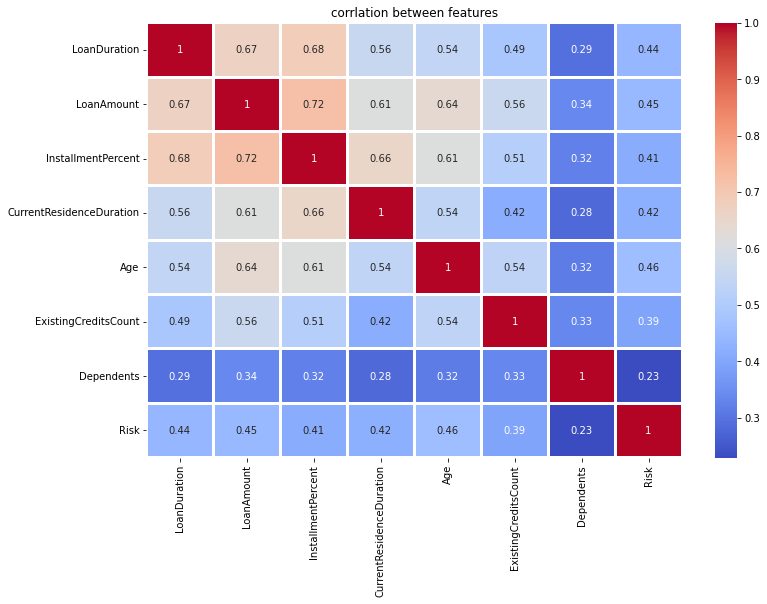

In [19]:
plt.figure(figsize=(12,8))
plt.title('corrlation between features',fontsize=12)
sns.heatmap(cor_data,linewidths=2,annot=True,cmap="coolwarm");
plt.show()

-----------

## BUCKET 

In [20]:
# age groups labeling
data['Age_Group'] = np.nan
lst = [data]

for col in lst:
    col.loc[(col['Age'] >= 19) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
data.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk,Age_Group
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,32,none,own,1,skilled,1,none,yes,0,Adults
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,37,stores,own,2,skilled,1,none,yes,0,Adults
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,28,none,own,2,skilled,1,yes,no,0,Young
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,32,none,own,1,skilled,1,none,yes,0,Adults
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,57,none,own,2,skilled,1,none,yes,1,Elder


In [21]:
# ExistingSavings groups labeling
data['ExistingSavings_Group'] = data["ExistingSavings"].map({'less_100':'little', '100_to_500':'moderate' ,"500_to_1000":"quite_rich" ,"greater_1000":'rich' })

In [22]:
# CheckingStatus groups labeling
data['CheckingStatus_Group'] = data["CheckingStatus"].map({'less_0':'fair', '0_to_200':'moderate' ,"greater_200":"rich" ,"no_checking":'no_checking' })

In [23]:
data

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk,Age_Group,ExistingSavings_Group,CheckingStatus_Group
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,own,1,skilled,1,none,yes,0,Adults,moderate,moderate
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,own,2,skilled,1,none,yes,0,Adults,little,fair
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,own,2,skilled,1,yes,no,0,Young,little,fair
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,own,1,skilled,1,none,yes,0,Adults,little,moderate
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,own,2,skilled,1,none,yes,1,Elder,quite_rich,no_checking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,none,...,own,1,skilled,1,none,yes,0,Adults,little,rich
4996,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,none,...,own,1,unemployed,1,none,yes,0,Adults,rich,moderate
4997,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,co-applicant,...,own,2,unskilled,2,yes,yes,1,Senior,NaN,no_checking
4998,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,co-applicant,...,own,1,skilled,1,none,yes,1,Young,quite_rich,moderate


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            4982 non-null   object
 1   LoanDuration              4982 non-null   int64 
 2   CreditHistory             4982 non-null   object
 3   LoanPurpose               4982 non-null   object
 4   LoanAmount                4982 non-null   int64 
 5   ExistingSavings           4982 non-null   object
 6   EmploymentDuration        4982 non-null   object
 7   InstallmentPercent        4982 non-null   int64 
 8   Sex                       4982 non-null   object
 9   OthersOnLoan              4982 non-null   object
 10  CurrentResidenceDuration  4982 non-null   int64 
 11  OwnsProperty              4982 non-null   object
 12  Age                       4982 non-null   int64 
 13  InstallmentPlans          4982 non-null   object
 14  Housing                 

## one hot encoding for categorical variables

In [25]:
categorical_cols = ['CheckingStatus_Group', 'CreditHistory', 'LoanPurpose', 'ExistingSavings_Group','EmploymentDuration','Sex','OthersOnLoan','OwnsProperty','InstallmentPlans','Housing','Job','ForeignWorker','Age_Group']
aa=pd.get_dummies(data, columns=categorical_cols)

aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CheckingStatus                        4982 non-null   object
 1   LoanDuration                          4982 non-null   int64 
 2   LoanAmount                            4982 non-null   int64 
 3   ExistingSavings                       4982 non-null   object
 4   InstallmentPercent                    4982 non-null   int64 
 5   CurrentResidenceDuration              4982 non-null   int64 
 6   Age                                   4982 non-null   int64 
 7   ExistingCreditsCount                  4982 non-null   int64 
 8   Dependents                            4982 non-null   int64 
 9   Telephone                             4982 non-null   object
 10  Risk                                  4982 non-null   int64 
 11  CheckingStatus_Group_fair     

In [26]:
# removing columns and add to new dataframe 
bb= aa.drop(columns=["CheckingStatus","ExistingSavings","Age" ,"Telephone","InstallmentPercent"])
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   LoanDuration                          4982 non-null   int64
 1   LoanAmount                            4982 non-null   int64
 2   CurrentResidenceDuration              4982 non-null   int64
 3   ExistingCreditsCount                  4982 non-null   int64
 4   Dependents                            4982 non-null   int64
 5   Risk                                  4982 non-null   int64
 6   CheckingStatus_Group_fair             4982 non-null   uint8
 7   CheckingStatus_Group_moderate         4982 non-null   uint8
 8   CheckingStatus_Group_no_checking      4982 non-null   uint8
 9   CheckingStatus_Group_rich             4982 non-null   uint8
 10  CreditHistory_all_credits_paid_back   4982 non-null   uint8
 11  CreditHistory_credits_paid_to_date    4982 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            4982 non-null   object
 1   LoanDuration              4982 non-null   int64 
 2   CreditHistory             4982 non-null   object
 3   LoanPurpose               4982 non-null   object
 4   LoanAmount                4982 non-null   int64 
 5   ExistingSavings           4982 non-null   object
 6   EmploymentDuration        4982 non-null   object
 7   InstallmentPercent        4982 non-null   int64 
 8   Sex                       4982 non-null   object
 9   OthersOnLoan              4982 non-null   object
 10  CurrentResidenceDuration  4982 non-null   int64 
 11  OwnsProperty              4982 non-null   object
 12  Age                       4982 non-null   int64 
 13  InstallmentPlans          4982 non-null   object
 14  Housing                 

## cheking the balance of data

In [28]:
X = bb.drop('Risk', axis=1)
y = bb['Risk'].values

In [29]:
pd.DataFrame(y).value_counts()

0    3312
1    1670
dtype: int64

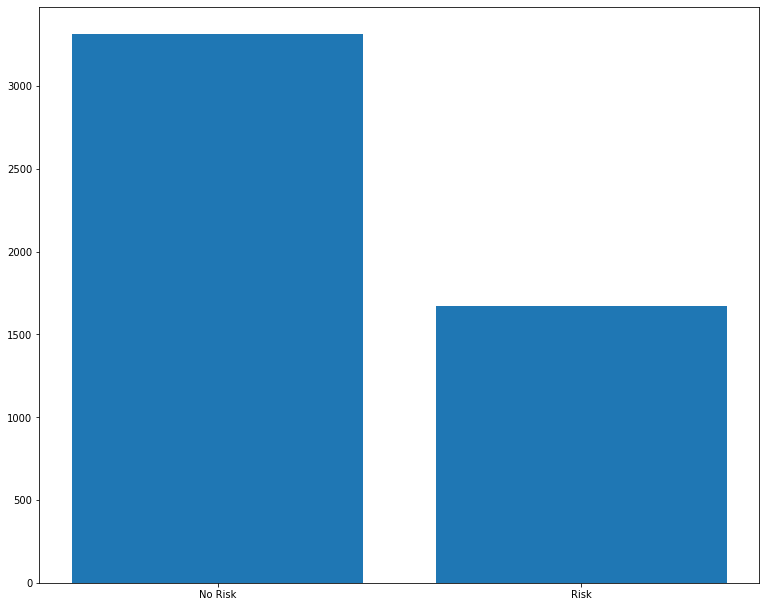

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
target = ['No Risk','Risk']
count = [3312,1670]
ax.bar(target,count)
plt.show()

## Apply PCA on the original data after daeling with the categorical variables and apply ML with different nuber of components

In [31]:
# This function for testing different components to each algorithm

c=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
def perform_PCA_TEST(model,X,y):
    z=[]
    for i in c:
        pca = PCA(n_components=i,random_state=0)
        PCA_data = pca.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(PCA_data,y, test_size=0.2, shuffle=True, stratify = y, random_state=0)

        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
        
        
        scaler = preprocessing.StandardScaler()
        X_train = scaler.fit_transform(X_resampled)
        X_test = scaler.fit_transform(X_test)

        model.fit(X_train, y_resampled)
        y_pred = model.predict(X_test)
        
        print(f"component :{i}")
        print(classification_report(y_test,y_pred,labels=model.classes_))
        auc= round(metrics.roc_auc_score(y_test,y_pred),2)
        f=round(metrics.f1_score(y_test,y_pred, average='weighted'),2)
        acc=round(metrics.accuracy_score(y_test,y_pred),2)
        p=round(metrics.precision_score(y_test,y_pred),2)
        r=round(metrics.recall_score(y_test,y_pred),2)
        

        print('AUC-ROC Score: ',auc)
        print('F1 Score: ',f)
        print('Accuracy Score: ',acc)
        print('Precision Score: ',p)
        print('Recall Score: ',r)
        
        z.append(auc)
         
        print("===========================")
    
    print(z)

    component = c
    roc_auc = z
    
    plt.plot(component,roc_auc,'b-o',label='AUC-ROC scores over different numbers of components');
    plt.xlabel('component')
    plt.ylabel('AUC-ROC score')
    plt.legend()
    plt.show()
  

----------

component :3
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       663
           1       0.55      0.81      0.66       334

    accuracy                           0.71       997
   macro avg       0.71      0.74      0.71       997
weighted avg       0.77      0.71      0.72       997

AUC-ROC Score:  0.74
F1 Score:  0.72
Accuracy Score:  0.71
Precision Score:  0.55
Recall Score:  0.81
component :4
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       663
           1       0.55      0.81      0.66       334

    accuracy                           0.72       997
   macro avg       0.71      0.74      0.71       997
weighted avg       0.77      0.72      0.73       997

AUC-ROC Score:  0.74
F1 Score:  0.73
Accuracy Score:  0.72
Precision Score:  0.55
Recall Score:  0.81
component :5
              precision    recall  f1-score   support

           0       0.87      0.68      0.76     

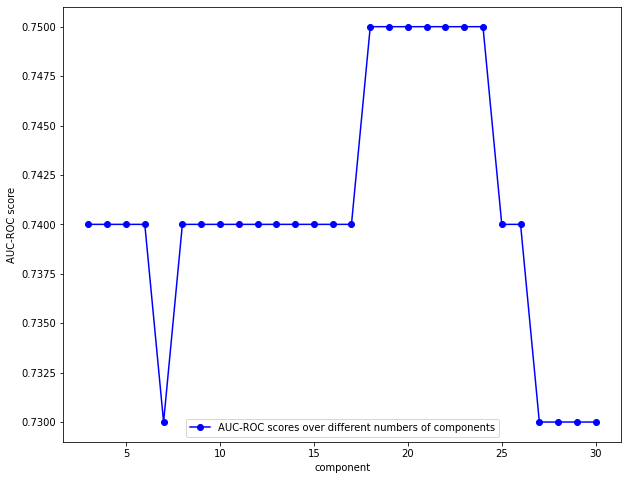

In [32]:
logistic_model = LogisticRegression(random_state=42)
perform_PCA_TEST(logistic_model,X, y)


----------

-------

component :3
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       663
           1       0.53      0.56      0.55       334

    accuracy                           0.69       997
   macro avg       0.65      0.66      0.65       997
weighted avg       0.69      0.69      0.69       997

AUC-ROC Score:  0.66
F1 Score:  0.69
Accuracy Score:  0.69
Precision Score:  0.53
Recall Score:  0.56
component :4
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       663
           1       0.51      0.57      0.53       334

    accuracy                           0.67       997
   macro avg       0.64      0.64      0.64       997
weighted avg       0.68      0.67      0.67       997

AUC-ROC Score:  0.64
F1 Score:  0.67
Accuracy Score:  0.67
Precision Score:  0.51
Recall Score:  0.57
component :5
              precision    recall  f1-score   support

           0       0.79      0.76      0.78     

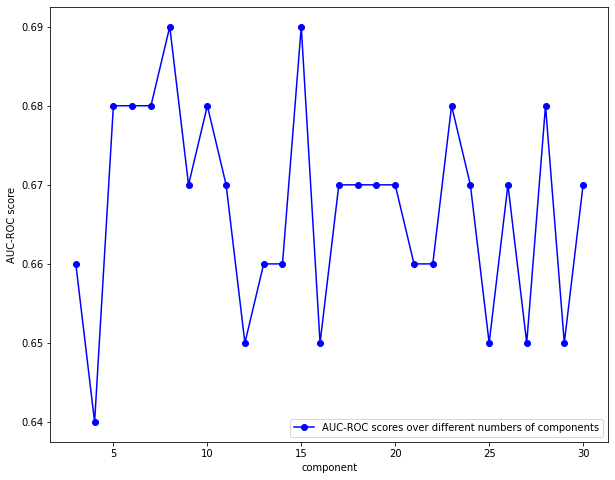

In [33]:
dt = tree.DecisionTreeClassifier(random_state=42)
perform_PCA_TEST(dt,X, y)

component :3
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       663
           1       0.51      0.69      0.58       334

    accuracy                           0.67       997
   macro avg       0.66      0.68      0.66       997
weighted avg       0.71      0.67      0.68       997

AUC-ROC Score:  0.68
F1 Score:  0.68
Accuracy Score:  0.67
Precision Score:  0.51
Recall Score:  0.69
component :4
              precision    recall  f1-score   support

           0       0.81      0.71      0.75       663
           1       0.53      0.66      0.59       334

    accuracy                           0.69       997
   macro avg       0.67      0.69      0.67       997
weighted avg       0.72      0.69      0.70       997

AUC-ROC Score:  0.69
F1 Score:  0.7
Accuracy Score:  0.69
Precision Score:  0.53
Recall Score:  0.66
component :5
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      

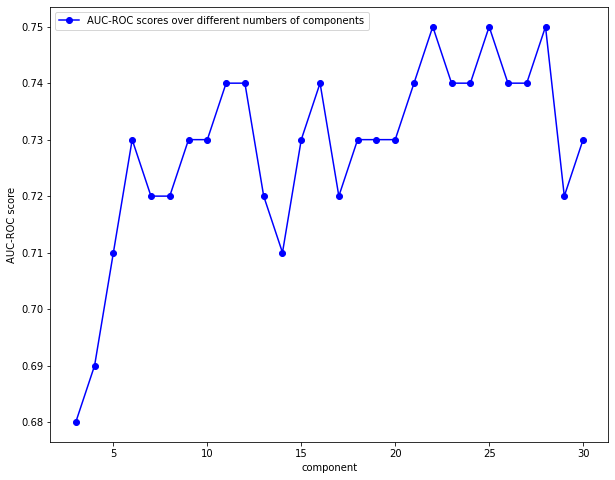

In [34]:
knn = KNeighborsClassifier(n_neighbors=8)
perform_PCA_TEST(knn,X, y)

component :3
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       663
           1       0.53      0.82      0.64       334

    accuracy                           0.70       997
   macro avg       0.70      0.73      0.69       997
weighted avg       0.76      0.70      0.70       997

AUC-ROC Score:  0.73
F1 Score:  0.7
Accuracy Score:  0.7
Precision Score:  0.53
Recall Score:  0.82
component :4
              precision    recall  f1-score   support

           0       0.88      0.63      0.74       663
           1       0.53      0.83      0.65       334

    accuracy                           0.70       997
   macro avg       0.71      0.73      0.69       997
weighted avg       0.76      0.70      0.71       997

AUC-ROC Score:  0.73
F1 Score:  0.71
Accuracy Score:  0.7
Precision Score:  0.53
Recall Score:  0.83
component :5
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       6

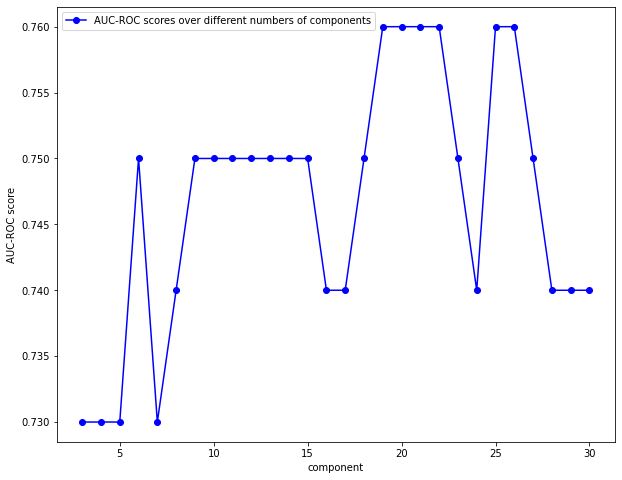

In [35]:
svc_model = svm.SVC(random_state=42)
perform_PCA_TEST(svc_model,X, y)

component :3
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       663
           1       0.55      0.67      0.60       334

    accuracy                           0.70       997
   macro avg       0.68      0.70      0.68       997
weighted avg       0.72      0.70      0.71       997

AUC-ROC Score:  0.7
F1 Score:  0.71
Accuracy Score:  0.7
Precision Score:  0.55
Recall Score:  0.67
component :4
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       663
           1       0.56      0.63      0.60       334

    accuracy                           0.71       997
   macro avg       0.68      0.69      0.69       997
weighted avg       0.72      0.71      0.72       997

AUC-ROC Score:  0.69
F1 Score:  0.72
Accuracy Score:  0.71
Precision Score:  0.56
Recall Score:  0.63
component :5
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       

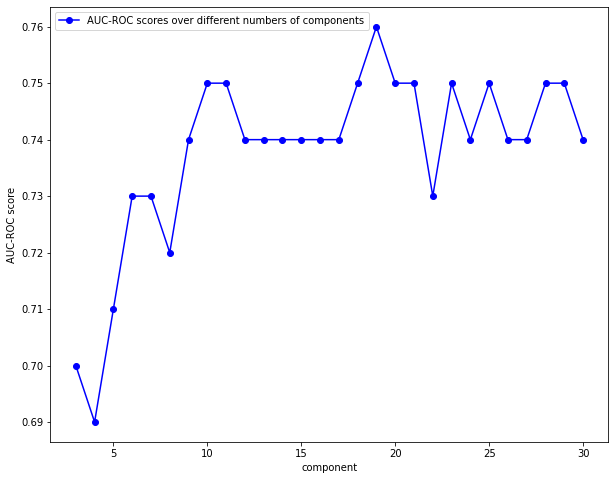

In [36]:
clf=RandomForestClassifier(n_estimators= 80 , random_state= 42)
perform_PCA_TEST(clf,X, y)

component :3
              precision    recall  f1-score   support

           0       0.88      0.68      0.76       663
           1       0.56      0.81      0.66       334

    accuracy                           0.72       997
   macro avg       0.72      0.74      0.71       997
weighted avg       0.77      0.72      0.73       997

AUC-ROC Score:  0.74
F1 Score:  0.73
Accuracy Score:  0.72
Precision Score:  0.56
Recall Score:  0.81
component :4
              precision    recall  f1-score   support

           0       0.86      0.69      0.77       663
           1       0.56      0.78      0.65       334

    accuracy                           0.72       997
   macro avg       0.71      0.74      0.71       997
weighted avg       0.76      0.72      0.73       997

AUC-ROC Score:  0.74
F1 Score:  0.73
Accuracy Score:  0.72
Precision Score:  0.56
Recall Score:  0.78
component :5
              precision    recall  f1-score   support

           0       0.87      0.71      0.78     

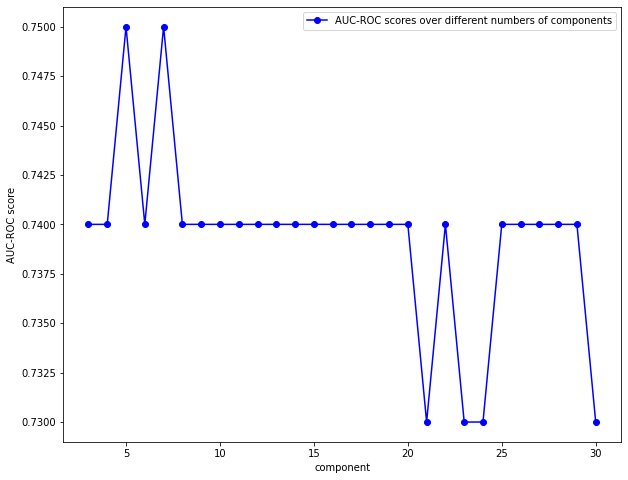

In [37]:
gnb = GaussianNB()
perform_PCA_TEST(gnb,X, y)

component :3
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       663
           1       0.53      0.78      0.63       334

    accuracy                           0.69       997
   macro avg       0.69      0.71      0.68       997
weighted avg       0.74      0.69      0.70       997

AUC-ROC Score:  0.71
F1 Score:  0.7
Accuracy Score:  0.69
Precision Score:  0.53
Recall Score:  0.78
component :4
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       663
           1       0.53      0.74      0.61       334

    accuracy                           0.69       997
   macro avg       0.68      0.70      0.68       997
weighted avg       0.73      0.69      0.70       997

AUC-ROC Score:  0.7
F1 Score:  0.7
Accuracy Score:  0.69
Precision Score:  0.53
Recall Score:  0.74
component :5
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       6

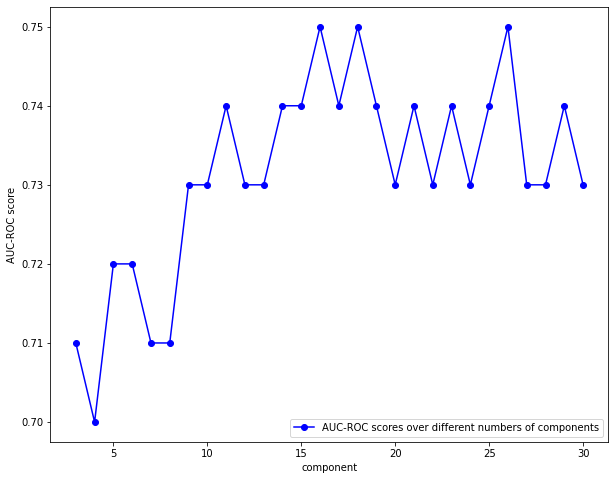

In [38]:
hist = HistGradientBoostingClassifier(random_state=42)
perform_PCA_TEST(hist,X, y)

component :3
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       663
           1       0.54      0.76      0.63       334

    accuracy                           0.70       997
   macro avg       0.69      0.71      0.69       997
weighted avg       0.74      0.70      0.71       997

AUC-ROC Score:  0.71
F1 Score:  0.71
Accuracy Score:  0.7
Precision Score:  0.54
Recall Score:  0.76
component :4
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       663
           1       0.53      0.74      0.62       334

    accuracy                           0.70       997
   macro avg       0.69      0.71      0.68       997
weighted avg       0.74      0.70      0.71       997

AUC-ROC Score:  0.71
F1 Score:  0.71
Accuracy Score:  0.7
Precision Score:  0.53
Recall Score:  0.74
component :5
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       

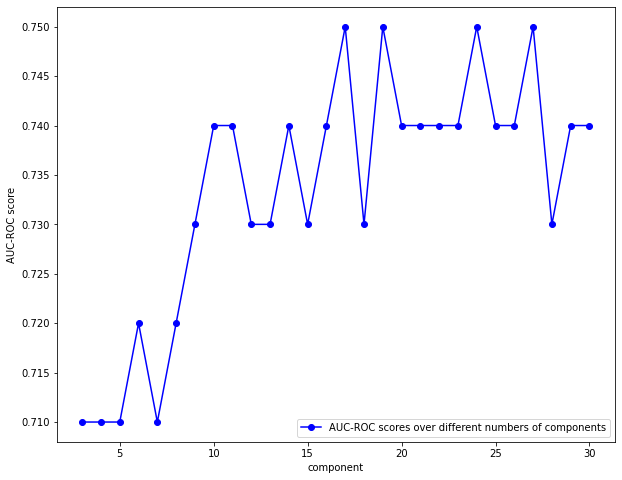

In [39]:
model = ltb.LGBMClassifier(random_state=42)
perform_PCA_TEST(model,X, y)

component :3
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       663
           1       0.55      0.78      0.64       334

    accuracy                           0.71       997
   macro avg       0.70      0.73      0.70       997
weighted avg       0.75      0.71      0.72       997

AUC-ROC Score:  0.73
F1 Score:  0.72
Accuracy Score:  0.71
Precision Score:  0.55
Recall Score:  0.78
component :4
              precision    recall  f1-score   support

           0       0.88      0.56      0.69       663
           1       0.50      0.85      0.63       334

    accuracy                           0.66       997
   macro avg       0.69      0.71      0.66       997
weighted avg       0.75      0.66      0.67       997

AUC-ROC Score:  0.71
F1 Score:  0.67
Accuracy Score:  0.66
Precision Score:  0.5
Recall Score:  0.85
component :5
              precision    recall  f1-score   support

           0       0.88      0.59      0.70      

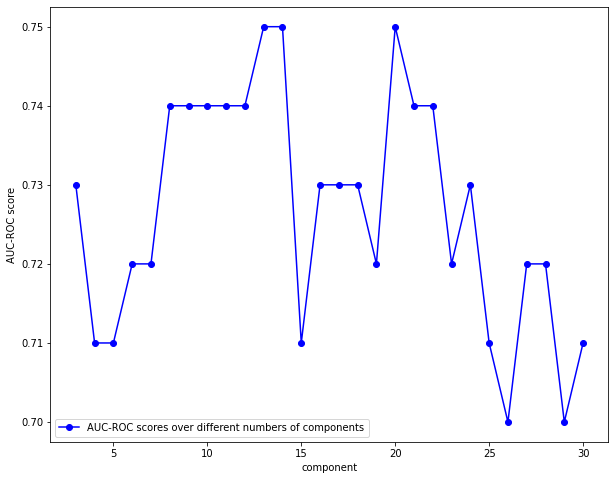

In [40]:
sgd= SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
perform_PCA_TEST(sgd,X, y)

-------------------------------

<h2 style="color:maroon"> Apply PCA with best number of components  </h2>

In [41]:
pca = PCA(n_components=19,random_state=0)
PCA_data = pca.fit_transform(X)

<h2 style="color:maroon"> split the data to train , test  </h2>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(PCA_data, y, test_size=0.2, shuffle=True, stratify = y, random_state=0)


In [43]:
pd.DataFrame(y_train).value_counts()

0    2649
1    1336
dtype: int64

In [44]:
pd.DataFrame(y_train).count()

0    3985
dtype: int64

In [45]:
pd.DataFrame(y_test).count()

0    997
dtype: int64

In [46]:
# over sampling the data to make it balanced
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [47]:
pd.DataFrame(y_resampled).value_counts()

0    2649
1    2649
dtype: int64

<h2 style="color:maroon"> Standardize features by removing the mean and scaling to unit variance  </h2>



In [48]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

----------

## Modeling


              precision    recall  f1-score   support

           0       0.84      0.74      0.78       663
           1       0.58      0.72      0.64       334

    accuracy                           0.73       997
   macro avg       0.71      0.73      0.71       997
weighted avg       0.75      0.73      0.74       997

AUC Score:  0.726562711680711
F1 Score:  0.74
Accuracy Score:  0.73
Precision Score:  0.58
Recall Score:  0.72


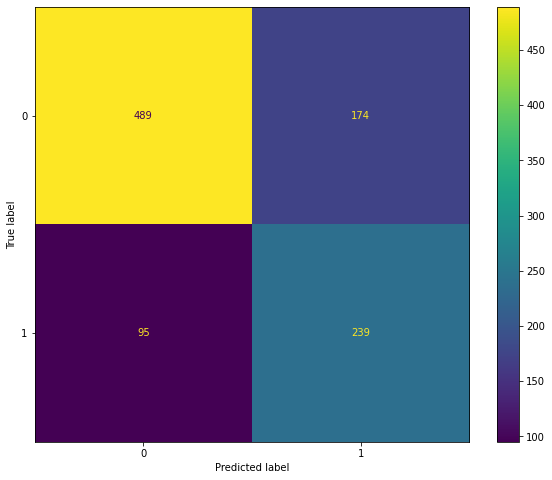

In [49]:
# SGD with 14 components
sgd= SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train,y_resampled)
y_pred=sgd.predict(X_test)

AUC=metrics.roc_auc_score(y_test,y_pred)
f=round(metrics.f1_score(y_test,y_pred, average='weighted'),2)
acc=round(metrics.accuracy_score(y_test,y_pred),2)
p=round(metrics.precision_score(y_test,y_pred),2)
r=round(metrics.recall_score(y_test,y_pred),2)
print()
print(classification_report(y_test,y_pred,labels=logistic_model.classes_))

print('AUC Score: ',AUC)
print('F1 Score: ',f)
print('Accuracy Score: ',acc)
print('Precision Score: ',p)
print('Recall Score: ',r)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()


              precision    recall  f1-score   support

           0       0.86      0.74      0.80       663
           1       0.60      0.76      0.67       334

    accuracy                           0.75       997
   macro avg       0.73      0.75      0.73       997
weighted avg       0.77      0.75      0.75       997

AUC Score:  0.75
F1 Score:  0.75
Accuracy Score:  0.75
Precision Score:  0.6
Recall Score:  0.76


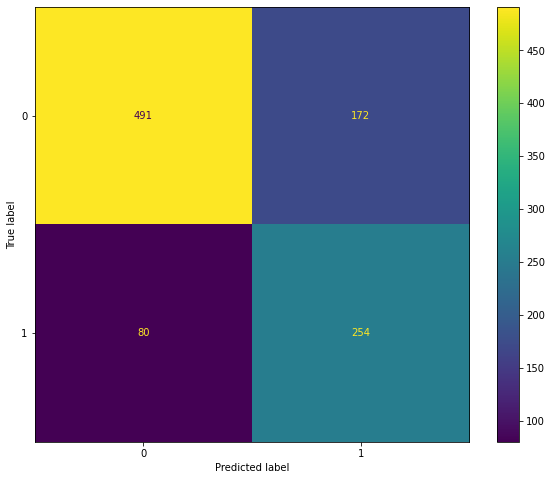

In [50]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train,y_resampled)
y_pred=logistic_model.predict(X_test)

auc= round(metrics.roc_auc_score(y_test,y_pred),2)
f=round(metrics.f1_score(y_test,y_pred, average='weighted'),2)
acc=round(metrics.accuracy_score(y_test,y_pred),2)
p=round(metrics.precision_score(y_test,y_pred),2)
r=round(metrics.recall_score(y_test,y_pred),2)
print()
print(classification_report(y_test,y_pred,labels=logistic_model.classes_))

print('AUC Score: ',auc)
print('F1 Score: ',f)
print('Accuracy Score: ',acc)
print('Precision Score: ',p)
print('Recall Score: ',r)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

AUC Score:  0.67
F1 Score:  0.7
Accuracy Score:  0.7
Precision Score:  0.55
Recall Score:  0.59

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       663
           1       0.55      0.59      0.57       334

    accuracy                           0.70       997
   macro avg       0.67      0.67      0.67       997
weighted avg       0.71      0.70      0.70       997



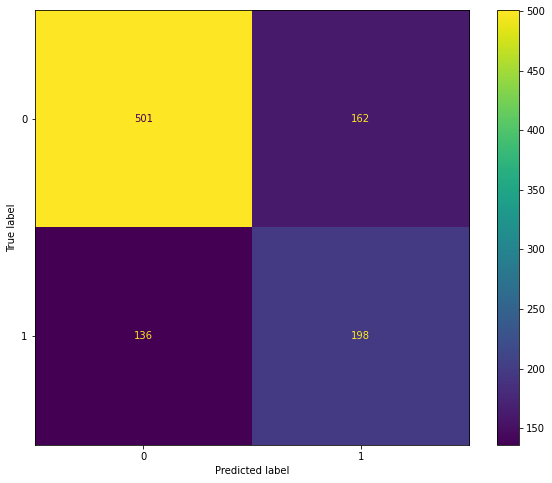

In [51]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_resampled)
y_pred=dt.predict(X_test)

auc= round(metrics.roc_auc_score(y_test,y_pred),2)
f=round(metrics.f1_score(y_test,y_pred, average='weighted'),2)
acc=round(metrics.accuracy_score(y_test,y_pred),2)
p=round(metrics.precision_score(y_test,y_pred),2)
r=round(metrics.recall_score(y_test,y_pred),2)

print('AUC Score: ',auc)
print('F1 Score: ',f)
print('Accuracy Score: ',acc)
print('Precision Score: ',p)
print('Recall Score: ',r)
print()
print(classification_report(y_test,y_pred,labels=dt.classes_))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

AUC Score:  0.73
F1 Score:  0.75
Accuracy Score:  0.75
Precision Score:  0.6
Recall Score:  0.69

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       663
           1       0.60      0.69      0.65       334

    accuracy                           0.75       997
   macro avg       0.72      0.73      0.72       997
weighted avg       0.76      0.75      0.75       997



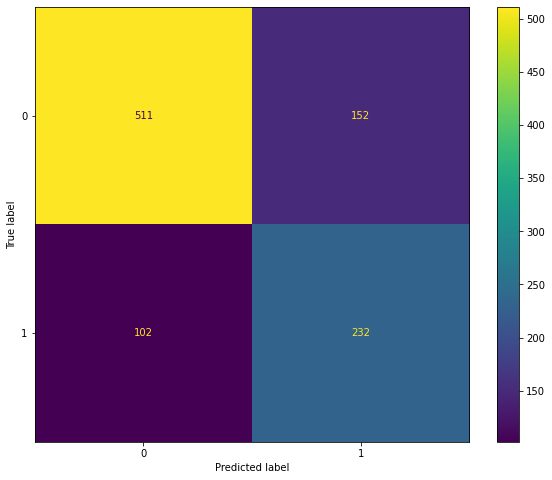

In [52]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_resampled)
y_pred=knn.predict(X_test)

auc= round(metrics.roc_auc_score(y_test,y_pred),2)
f=round(metrics.f1_score(y_test,y_pred, average='weighted'),2)
acc=round(metrics.accuracy_score(y_test,y_pred),2)
p=round(metrics.precision_score(y_test,y_pred),2)
r=round(metrics.recall_score(y_test,y_pred),2)

print('AUC Score: ',auc)
print('F1 Score: ',f)
print('Accuracy Score: ',acc)
print('Precision Score: ',p)
print('Recall Score: ',r)
print()
print(classification_report(y_test,y_pred,labels=knn.classes_))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

AUC Score:  0.76
F1 Score:  0.77
Accuracy Score:  0.77
Precision Score:  0.63
Recall Score:  0.74

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       663
           1       0.63      0.74      0.68       334

    accuracy                           0.77       997
   macro avg       0.74      0.76      0.75       997
weighted avg       0.78      0.77      0.77       997



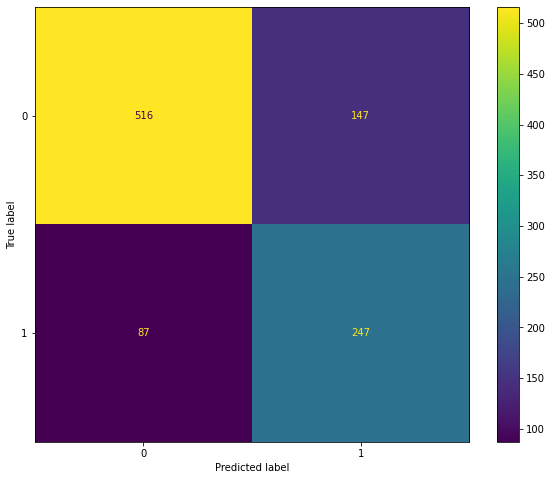

In [53]:
svc_model = svm.SVC()
svc_model.fit(X_train,y_resampled)
y_pred=svc_model.predict(X_test)

auc= round(metrics.roc_auc_score(y_test,y_pred),2)
f=round(metrics.f1_score(y_test,y_pred, average='weighted'),2)
acc=round(metrics.accuracy_score(y_test,y_pred),2)
p=round(metrics.precision_score(y_test,y_pred),2)
r=round(metrics.recall_score(y_test,y_pred),2)

print('AUC Score: ',auc)
print('F1 Score: ',f)
print('Accuracy Score: ',acc)
print('Precision Score: ',p)
print('Recall Score: ',r)
print()
print(classification_report(y_test,y_pred,labels=svc_model.classes_))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()


              precision    recall  f1-score   support

           0       0.84      0.74      0.78       663
           1       0.58      0.72      0.64       334

    accuracy                           0.73       997
   macro avg       0.71      0.73      0.71       997
weighted avg       0.75      0.73      0.74       997

AUC Score:  0.73
F1 Score:  0.74
Accuracy Score:  0.73
Precision Score:  0.58
Recall Score:  0.72


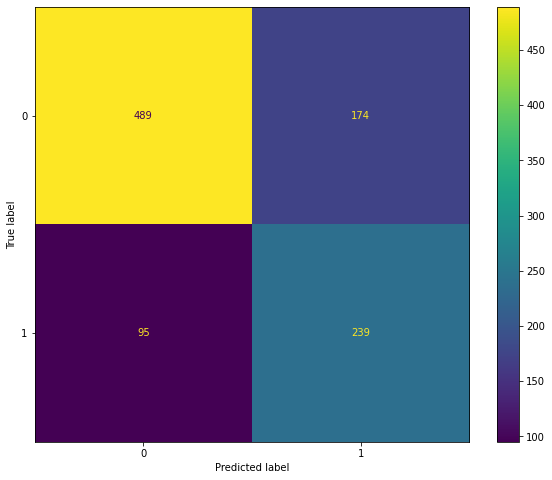

In [54]:
# SGD with 19 components
sgd= SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train,y_resampled)
y_pred=sgd.predict(X_test)

auc= round(metrics.roc_auc_score(y_test,y_pred),2)
f=round(metrics.f1_score(y_test,y_pred, average='weighted'),2)
acc=round(metrics.accuracy_score(y_test,y_pred),2)
p=round(metrics.precision_score(y_test,y_pred),2)
r=round(metrics.recall_score(y_test,y_pred),2)
print()
print(classification_report(y_test,y_pred,labels=sgd.classes_))

print('AUC Score: ',auc)
print('F1 Score: ',f)
print('Accuracy Score: ',acc)
print('Precision Score: ',p)
print('Recall Score: ',r)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

# champion model

AUC Score:  0.76
F1 Score:  0.79
Accuracy Score:  0.8
Precision Score:  0.72
Recall Score:  0.64

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       663
           1       0.72      0.64      0.68       334

    accuracy                           0.80       997
   macro avg       0.77      0.76      0.77       997
weighted avg       0.79      0.80      0.79       997



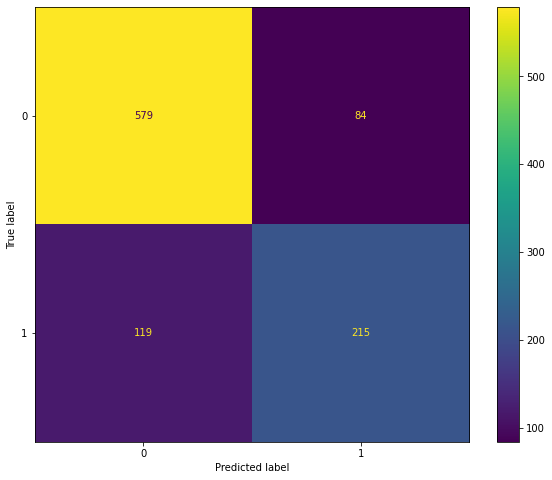

In [55]:
from sklearn.metrics import roc_auc_score
clf=RandomForestClassifier(n_estimators=80 , random_state= 42)
clf.fit(X_train,y_resampled)
y_pred=clf.predict(X_test)

auc= round(metrics.roc_auc_score(y_test,y_pred),2)
f=round(metrics.f1_score(y_test,y_pred, average='weighted'),2)
acc=round(metrics.accuracy_score(y_test,y_pred),2)
p=round(metrics.precision_score(y_test,y_pred),2)
r=round(metrics.recall_score(y_test,y_pred),2)

print('AUC Score: ',auc)
print('F1 Score: ',f)
print('Accuracy Score: ',acc)
print('Precision Score: ',p)
print('Recall Score: ',r)


print()
print(classification_report(y_test,y_pred,labels=clf.classes_))

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

--------

In [56]:
import openpyxl as xls

In [57]:
excel = pd.ExcelWriter("G3.credit_risk.xlsx")

In [58]:
data.to_excel(excel)

In [59]:
excel.save()